In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## PART1

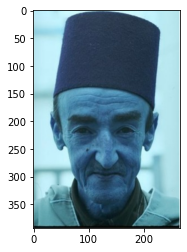

In [2]:
BGRimg = cv2.imread("test.jpeg") ## Read Image
plt.imshow(BGRimg)

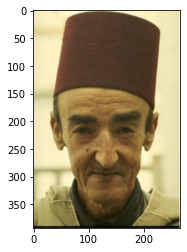

In [3]:
RGBimg=cv2.cvtColor(BGRimg, cv2.COLOR_BGR2RGB) ## Convert from BGR to RGP
plt.imshow(RGBimg)

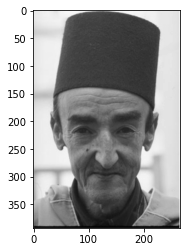

In [4]:
GRAYimg= cv2.cvtColor(RGBimg, cv2.COLOR_RGB2GRAY) ## Convert from RGP to Grey
plt.imshow(GRAYimg,cmap='gray')

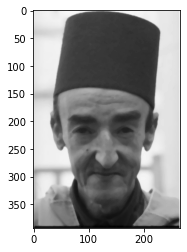

In [5]:
medianFilter=cv2.medianBlur(GRAYimg,5) ## Using Blur to reduce noise
plt.imshow(medianFilter,cmap='gray')

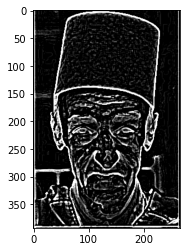

In [7]:
LAPLACIANimg=cv2.Laplacian(medianFilter,cv2.CV_8U,ksize=5) ## Laplacian to detect Edges
plt.imshow(LAPLACIANimg,cmap='gray')

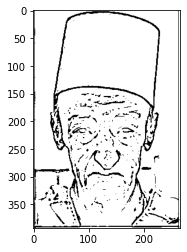

In [8]:
_,THRESHimg=cv2.threshold(LAPLACIANimg,150,255,cv2.THRESH_BINARY_INV) ## Double checking for edge detection
plt.imshow(THRESHimg,cmap='gray')

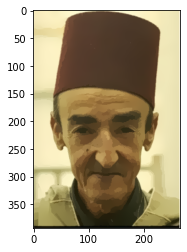

In [9]:
BILATERALimg=cv2.bilateralFilter(RGBimg,9,9,7)  
for i in range(15):
    BILATERALimg=cv2.bilateralFilter(BILATERALimg,9,9,7)
plt.imshow(BILATERALimg)

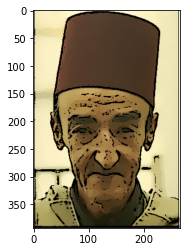

In [10]:
FINALimg=cv2.cvtColor(THRESHimg, cv2.COLOR_GRAY2RGB)   ## Add thresh-hold image to bilateral image to form cartoon image
OUTPUTimg=cv2.addWeighted(BILATERALimg, 1, FINALimg,1, -255)
plt.imshow(OUTPUTimg)

## PART2

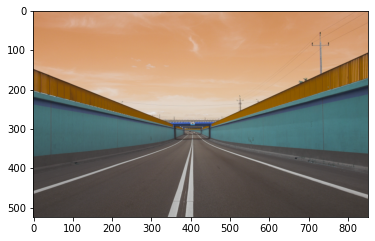

In [2]:
BGR_LANEimg = cv2.imread("testHough1.png") ## read test image
plt.imshow(BGR_LANEimg)

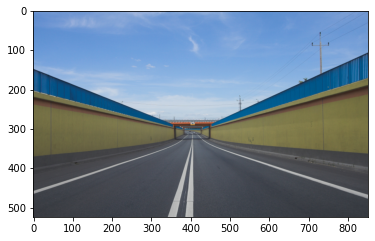

In [4]:
RGB_LANEimg =cv2.cvtColor(BGR_LANEimg, cv2.COLOR_BGR2RGB) ## convert BGR to RGP
plt.imshow(RGB_LANEimg)

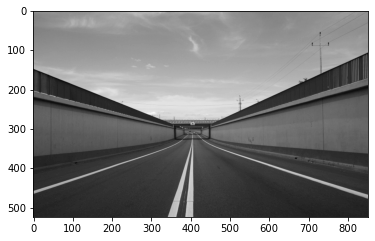

In [5]:
GRAY_LANEimg =cv2.cvtColor(RGB_LANEimg, cv2.COLOR_RGB2GRAY) ## Convert RGP to Grey
plt.imshow(GRAY_LANEimg,cmap="gray")

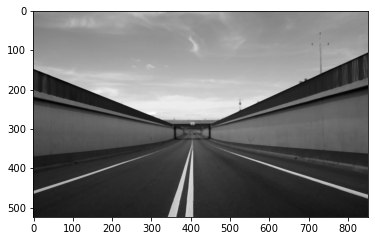

In [6]:
MEDIANFilter=cv2.medianBlur(GRAY_LANEimg,5) ## Blur to reduce noise
plt.imshow(MEDIANFilter,cmap="gray")

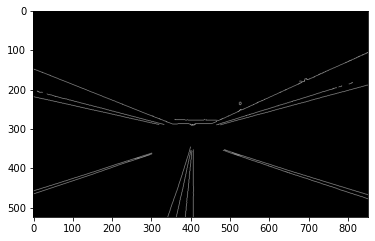

In [7]:
canny=cv2.Canny(MEDIANFilter,150,250)  ## Cannay filter to detect edges
plt.imshow(canny,cmap="gray")

In [8]:
ROI=canny ## Get Region of interest
ROI[0:350,0:852] =0

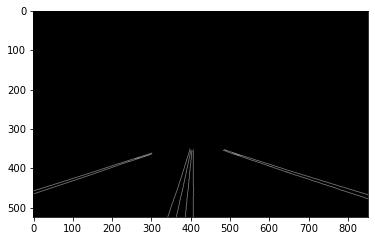

In [9]:
plt.imshow(ROI,cmap="gray") 

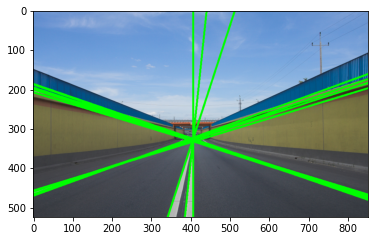

In [13]:
x= hugh(ROI,150) ## apply Hugh Transform
plt.imshow(x)

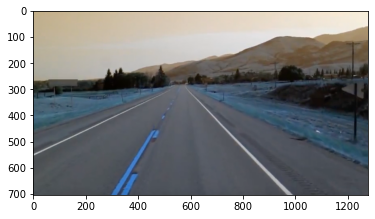

In [164]:
BGR_LANEimg = cv2.imread("testHough.jpg")
plt.imshow(BGR_LANEimg)

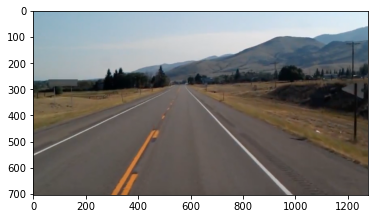

In [165]:
RGB_LANEimg =cv2.cvtColor(BGR_LANEimg, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_LANEimg)

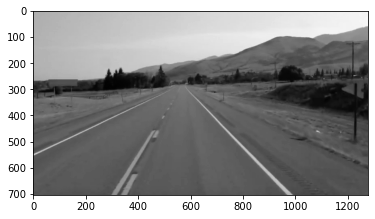

In [166]:
GRAY_LANEimg =cv2.cvtColor(RGB_LANEimg, cv2.COLOR_RGB2GRAY)
plt.imshow(GRAY_LANEimg,cmap="gray")

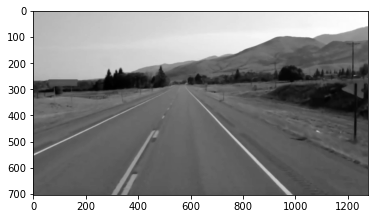

In [167]:
MEDIANFilter=cv2.medianBlur(GRAY_LANEimg,5)
plt.imshow(MEDIANFilter,cmap="gray")

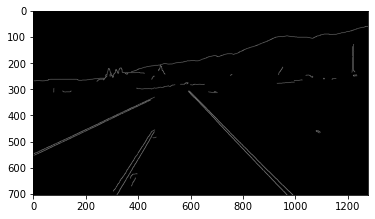

In [172]:
canny=cv2.Canny(MEDIANFilter,100,190)
plt.imshow(canny,cmap="gray")

In [173]:
ROI=canny
ROI[0:400,0:1279] =0
ROI[0:704,980:1279] = 0

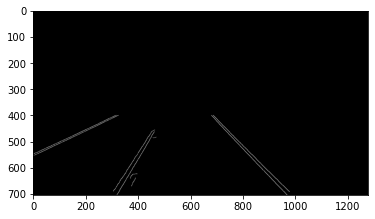

In [174]:
plt.imshow(ROI,cmap="gray")

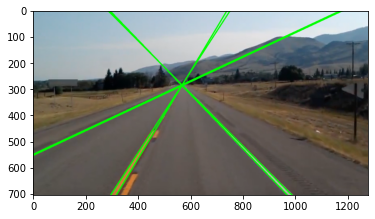

In [175]:
y = hugh(ROI,280)
plt.imshow(y)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


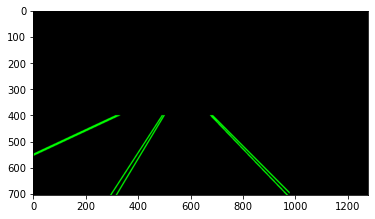

In [41]:
c_lines = lines ## Trying to add to original Image
c_lines[0:400,0:1279] =0
c_lines[0:704,980:1279] =0
plt.imshow(c_lines)

In [11]:
def hugh(ROI,th):

    height,width=ROI.shape[0],ROI.shape[1] 
    max_radius = np.sqrt(width*width + height*height) ## Defining Diagonal 
    rhos = np.arange(-max_radius,max_radius,step=(2*max_radius/max_radius))  ## rhos -d , d 
    thetas = np.deg2rad(np.arange(0,181)) ## thetas 0 , 180
    cos= np.cos(thetas)
    sin= np.sin(thetas)

    accumulator = np.zeros((len(rhos),181)) ## defining Acc(rhos,thetas)
    for y in range(height):
        for x in range(width):
            if ROI[y][x] != 0: ## if Edge detected then loop through all thetas to calculate rhos then adding one to accumulator 
                for theta in range(181):
                    rho = (x-width/2) * cos[theta] + (y-height/2) * sin[theta]
                    rho_index = np.argmin(np.abs(rhos-rho))
                    accumulator[rho_index][theta] += 1
                    
    for y in range(accumulator.shape[0]): 
        for x in range(accumulator.shape[1]):
            if accumulator[y][x] > th: ## getting local maximum points depending on voting ,
                rho = rhos[y]
                theta = thetas[x]
                a = np.cos((theta))
                b = np.sin((theta))
                x0 = (a*rho) + (width/2)
                y0 = (b*rho) + (height/2)
                x1 = int(x0 + 1000 * (-b))
                y1 = int(y0 + 1000 * (a))
                x2 = int(x0 - 1000 * (-b))
                y2 = int(y0 - 1000 * (a))
                cv2.line(RGB_LANEimg,(x1,y1),(x2,y2),(0,255,0),3) ## draw line.
    return RGB_LANEimg